In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the final dataset
df = pd.read_csv('clean_final_data.csv')
#removing the extra indexed column
df = df.drop(columns = 'Unnamed: 0')
df.head()

,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos,target_variable
0,1358.98,1374.71,1358.98,1368.70,593003200.0,2012-04-11,108.142857,0.01,Positive,2012,4,11,0,0,1,0
1,1368.77,1388.13,1368.77,1387.56,547368832.0,2012-04-12,75.000000,0.11,Positive,2012,4,12,0,0,1,1
2,1387.61,1387.61,1369.85,1370.26,631237824.0,2012-04-13,73.000000,0.00,Neutral,2012,4,13,0,1,0,0
3,1370.27,1379.66,1365.38,1369.57,596952128.0,2012-04-16,188.500000,0.13,Positive,2012,4,16,0,0,1,0
4,1369.57,1392.76,1369.57,1390.78,566529216.0,2012-04-17,235.529412,0.10,Positive,2012,4,17,0,0,1,1


In [3]:
#checking the formatting or data types of the features
df.dtypes

open               float64
high               float64
low                float64
close              float64
volume             float64
date_parsed         object
cont_len           float64
cont_pol           float64
cont_sent           object
date_year            int64
date_month           int64
date_day             int64
sent_neg             int64
sent_neu             int64
sent_pos             int64
target_variable      int64
dtype: object

In [4]:
#changing the datatype to datetime
df['date_parsed'] = pd.to_datetime(df['date_parsed'],format="%Y-%m-%d")

## Assign the dependent and independent features into different variable.

In [5]:
#independent variable
X = df.drop(['target_variable','date_parsed','cont_sent'], axis = 1)
X.head()

,open,high,low,close,volume,cont_len,cont_pol,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos
0,1358.98,1374.71,1358.98,1368.70,593003200.0,108.142857,0.01,2012,4,11,0,0,1
1,1368.77,1388.13,1368.77,1387.56,547368832.0,75.000000,0.11,2012,4,12,0,0,1
2,1387.61,1387.61,1369.85,1370.26,631237824.0,73.000000,0.00,2012,4,13,0,1,0
3,1370.27,1379.66,1365.38,1369.57,596952128.0,188.500000,0.13,2012,4,16,0,0,1
4,1369.57,1392.76,1369.57,1390.78,566529216.0,235.529412,0.10,2012,4,17,0,0,1


In [6]:
#dependent variable
y = df.pop('target_variable')
y

0       0
1       1
2       0
3       0
4       1
       ..
1632    1
1633    0
1634    0
1635    1
1636    1
Name: target_variable, Length: 1637, dtype: int64

In [7]:
y.value_counts()

1    885
0    752
Name: target_variable, dtype: int64

In [8]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Standardizing the data before applying logistic regression

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#importing LogisticRegression model
from sklearn.linear_model import LogisticRegression

#fitting the model on training dataset
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
#model prediction
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [12]:
score1 = model.score(X_train, y_train)
print('The differences between actual y_train and trained y_train seems to be ', score1)

The differences between actual y_train and trained y_train seems to be  0.6913674560733384


In [13]:
score2 = model.score(X_test, y_test)
print('The differences between actual y_test and trained y_pred seems to be ', score2)

The differences between actual y_test and trained y_pred seems to be  0.6798780487804879


## Evaluation metrics

In [14]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
acc_score = accuracy_score(y_test,y_pred)
acc_score_per = acc_score * 100
print('The accuracy score is ', acc_score, '/', acc_score_per , '%.')

              precision    recall  f1-score   support

           0       0.85      0.42      0.56       161
           1       0.62      0.93      0.75       167

    accuracy                           0.68       328
   macro avg       0.74      0.68      0.66       328
weighted avg       0.74      0.68      0.66       328

The accuracy score is  0.6798780487804879 / 67.98780487804879 %.


## Confustion matrix

In [15]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 68,  93],
       [ 12, 155]], dtype=int64)

Text(30.5, 0.5, 'True Label')

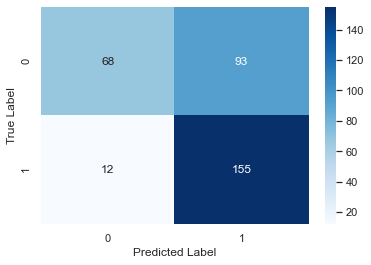

In [16]:
#heatmap of confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Reciever Operating Characteristics Curve (ROC Curve)

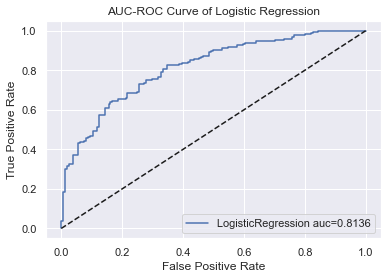

The ROC score is  0.813553018187228 / 81.35530181872281 %.


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

pred_prob = model.predict_proba(X_test)[::,1]
fpr_log,tpr_log,_ =roc_curve(y_test, pred_prob)
roc_score = roc_auc_score(y_test, pred_prob)
roc_score_per = roc_score * 100

plt.plot(fpr_log,tpr_log,label = 'LogisticRegression auc={:.4f}'.format(roc_score))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of Logistic Regression')
plt.legend(loc=4)
plt.show()

print('The ROC score is ', roc_score, '/', roc_score_per , '%.')

## Summary:
The left corner of our model is quite near to top-left corner but not exactly so the roc curve of our model is average. \ In general AUC of 0.8-0.9 is considered good but above 0.9 is considered excellent. \ And also our accuracy score for model is not that good so let's try some Hyperparameter tuning.

## Hyperparameter Tuning
There are various different methods for Hyperparameter Tuning But we don't have that great number of independent features so we'll choose GridSearchCV for hyperparameter tuning for our model. Most of the variables in algorithms cannot be changed (parameters) but we can change few parameterss (Hyperparameters) to tune our Logistic Regression model like:

1. estimator: In this we have to pass the models or functions on which we want to use GridSearchCV
2. param_grid: Dictionary or list of parameters of models or function in which GridSearchCV have to select the best.
3. Scoring: It is used as a evaluating metric for the model performance to decide the best hyperparameters, if not especified then it uses estimator score.
4. cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
5. n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.

In [18]:
from sklearn.model_selection import GridSearchCV

#Penalty for handling the overfitting and underfitting
penalty=['l1', 'l2', 'elasticnet']
#Algorithm to use in the optimization problem.
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#Maximum number of iterations taken for the solvers to converge
max_iter=[100,200,300,350]

In [19]:
#creating a random grid
random_grid={'penalty':penalty,
             'solver':solver,
             'max_iter':max_iter,
             }

In [20]:
# Cross validation - 20
log_reg_grid_search=GridSearchCV(estimator=model, param_grid=random_grid, cv=20, n_jobs=-1, verbose=2)

In [21]:
log_reg_grid_search.fit(X_train,y_train)

Fitting 20 folds for each of 60 candidates, totalling 1200 fits


GridSearchCV(cv=20, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 300, 350],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [22]:
log_reg_grid_search.best_params_

{'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [23]:
score1 = log_reg_grid_search.score(X_train, y_train)
print('The differences between actual y_train and trained y_train seems to be ', score1)

score2 = log_reg_grid_search.score(X_test, y_test)
print('The differences between actual y_test and trained y_pred seems to be ', score2)

The differences between actual y_train and trained y_train seems to be  0.8938120702826585
The differences between actual y_test and trained y_pred seems to be  0.9390243902439024


In [24]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = log_reg_grid_search.predict(X_test)
print(classification_report(y_test,y_pred))
acc_score = accuracy_score(y_test,y_pred)
acc_score_per = acc_score * 100
print('The accuracy score is ', acc_score, '/', acc_score_per , '%.')

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       161
           1       0.92      0.96      0.94       167

    accuracy                           0.94       328
   macro avg       0.94      0.94      0.94       328
weighted avg       0.94      0.94      0.94       328

The accuracy score is  0.9390243902439024 / 93.90243902439023 %.


## Summary:
Accuracy score:

Before Hyperparameter tuning: 0.6798780487804879 / 67.98780487804879 %. \ After Hyperparameter tunign: 0.9390243902439024 / 93.90243902439023 %.

Hence, we can see how our accuracy has gradually changed after Hyperparameter tuning.

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[148,  13],
       [  7, 160]], dtype=int64)

Text(30.5, 0.5, 'True Label')

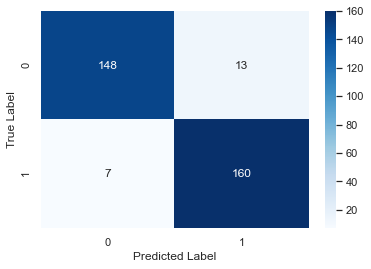

In [26]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


## Summary:
True Negative: 148 (Before Hyperparameter Tuning: 68) \ False Positive: 13 (Before Hyperparameter Tuning: 93) \ False Negative: 7 (Before Hyperparameter Tuning: 12) \ True Positive: 160 (Before Hyperparameter Tuning: 155)

Hence, we can say our model is doing great after hyperparameter tuning.

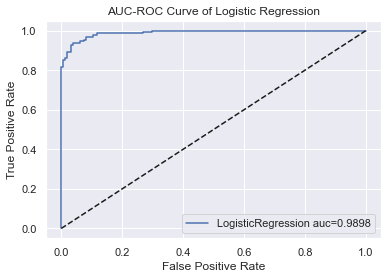

The AUC is  0.9898092014728307 / 98.98092014728307 %.


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

pred_prob = log_reg_grid_search.predict_proba(X_test)[::,1]
fpr_log,tpr_log,_ =roc_curve(y_test, pred_prob)
roc_score = roc_auc_score(y_test, pred_prob)
roc_score_per = roc_score * 100

plt.plot(fpr_log,tpr_log,label = 'LogisticRegression auc={:.4f}'.format(roc_score))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of Logistic Regression')
plt.legend(loc=4)
plt.show()

print('The AUC is ', roc_score, '/', roc_score_per , '%.')

## Summary:
The AUC score is 0.98988358686354 / 98.988358686354 % (AUC value about 0.9 is considered outstanding). Hence model has satisfying AUC score.
From the curve also we can see, the line is so close to top-left corner. Hence, our model is really good.

## Pickling

In [28]:
import pickle
# Open a file, where you want to store the data
file = open('stock_log_reg.pkl', 'wb')

# Dump information to that file
pickle.dump(log_reg_grid_search, file)
file.close()